### Simple Linear Regression is a statistical technique used for finding the existence of association relationship between a dependent variable and independent variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets/NewspaperData.csv')
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [4]:
df.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [5]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


Text(0.5, 1.0, 'Sunday vs Daily')

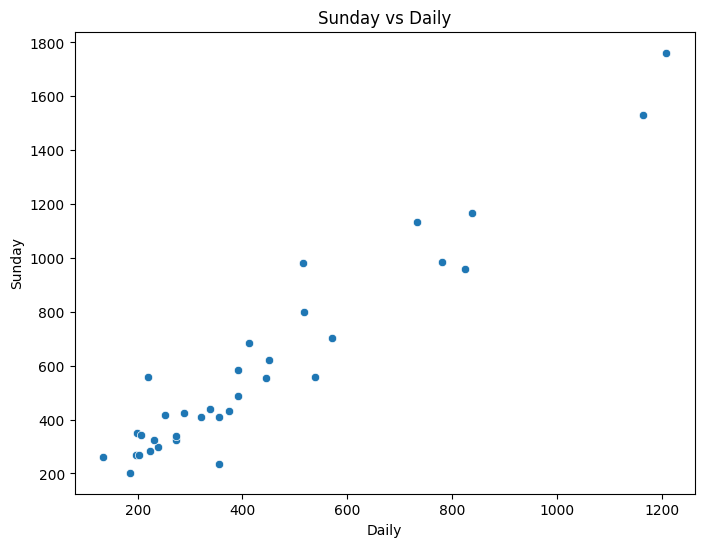

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.daily, y=df.sunday)
plt.xlabel('Daily')
plt.ylabel('Sunday')
plt.title('Sunday vs Daily')

Text(0.5, 1.0, 'Daily')

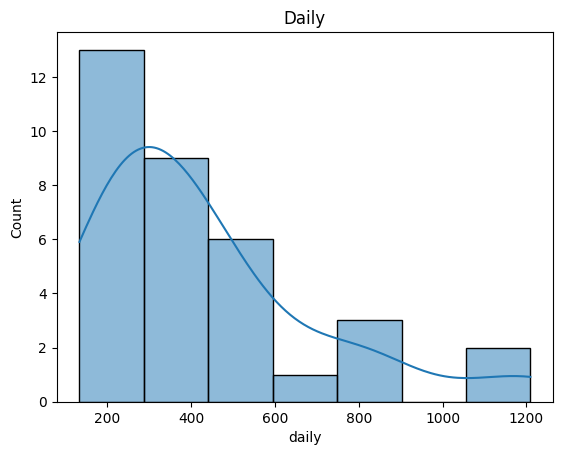

In [7]:
sns.histplot(df.daily, kde=True)
plt.title('Daily')

Text(0.5, 1.0, 'Sunday')

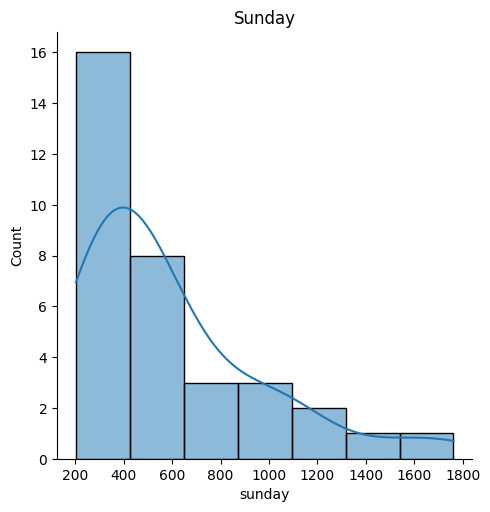

In [8]:
sns.displot(df.sunday, kde=True)
plt.title('Sunday')

<Axes: xlabel='daily', ylabel='sunday'>

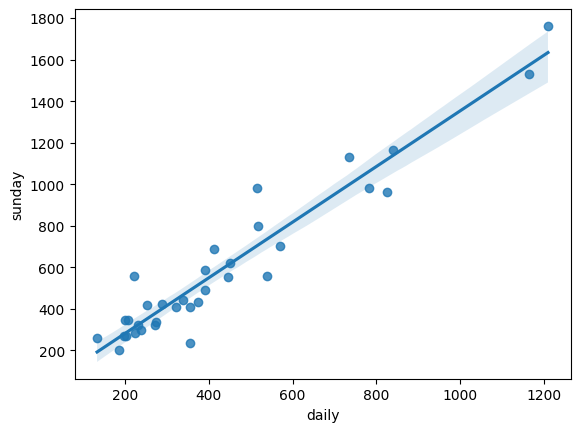

In [9]:
sns.regplot(data=df, x='daily', y='sunday')

In [10]:
df.corr(numeric_only=True)

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [11]:
import statsmodels.formula.api as smf
model = smf.ols('sunday ~ daily', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           6.02e-19
Time:                        22:38:03   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Coefficients
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [13]:
print(model.tvalues, '\n', model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


#### Predicting the New Data Point

In [14]:
new_data = pd.Series([200, 250, 300])
df_pred = pd.DataFrame(new_data, columns = ['daily'])
df_pred

,daily
0,200
1,250
2,300


In [15]:
model.predict(df_pred)

0    281.778581
1    348.764319
2    415.750057
dtype: float64

In [16]:
model.predict({'daily' : 250})

0    348.764319
dtype: float64